# The Energy of a Quantum Physical Two-Body System

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Constants

In [2]:
# sigma = 1
# x0 = 0

planck = 6.626e-34
reduced_planck = planck/(2*np.pi)
e_mass = 9.109e-31

## Discretization

In [3]:
# Length of interval
L = 10 
# No. of subintervals
N = 100
# Stepsize
h = L / (N-1)

# Argument vector
xi = np.linspace(-L/2, L/2, N)

## Functions

In [4]:
def v_func(x):
    return x**2/2

In [5]:
def psi_func(x, *args):
    x0, sigma = args
    return (1/np.sqrt(2*sigma))*np.exp(-((x-x0)**2)/2*sigma**2)

In [6]:
def populate_vector(func, *args):
    vector = [func(xi[i], *args) for i in range(N)]
    return np.array(vector).reshape(-1, 1)

In [7]:
def finite_difference_scheme():
    m = np.zeros((N,N))
    for i in range(N):
        m[i,i] = -2
        if i+1 < N:
            m[i,i+1] = 1
        if i-1 >= 0:
            m[i, i-1] = 1
    return m

In [8]:
# Initializing vectors
v_vector = populate_vector(v_func)
finite_difference_matrix = finite_difference_scheme()
    
    

In [9]:
def compute_e(x0, sigma):
    psi_vector = populate_vector(psi_func, x0, sigma)
    
    #kinetic_constant = -reduced_planck**2/(2*e_mass) # Kan være 1 inntil videre
    h_matrix = (1/h**2)*(psi_vector * finite_difference_matrix) + (v_vector * psi_vector)
     
    return (h*(psi_vector.T @ h_matrix) @ psi_vector)[0][0]

In [10]:
def finite_difference_e(x, y):
    return (compute_e(x+h, y) - compute_e(x-h, y))/2*h

In [11]:
def gradient_descent_next(x0, sigma):
    lr = 0.01
    # print(finite_difference_e(sigma, x0))
    x0 = x0 - lr*finite_difference_e(x0, sigma)
    sigma = sigma - lr*finite_difference_e(sigma, x0)
    return (x0, sigma)
    
    

In [12]:
def gradient_descent(x0, sigma):
    iterations = 0
    max_iterations = 1000
    precision = 1e-7
    
    e = 0
    e_next = compute_e(x0, sigma)
    
    while (iterations < max_iterations) and (abs(e_next-e) > precision):
    
        e = e_next
        x0, sigma = gradient_descent_next(x0, sigma)
        
        e_next = compute_e(x0, sigma)
        
        if iterations % 10 == 0:
            print(e_next)
        iterations += 1

    
    
    return x0, sigma

## Computing the Energy

In [29]:
e = compute_e(x0=0, sigma=3)
print(e)

-0.18471882460207187


In [14]:
print(gradient_descent(0.5, 1))



5.947001743454425
13.649229579318668
34.41655052355459
103.31164110383062
415.0508985065795
1558.8385467478367
1627.1405538592312
205.52349802163312
5.520107379313202
-0.09465536599544014
-0.17344843055324927
-0.1325809922065875
-0.10634749469951885
-0.0926578504900566
-0.08557223972855892
-0.08150201464408154
-0.0788702716832828
-0.07700304604946104
-0.07558612218135474
-0.07445750012949512
-0.07352593134178996
-0.07273612290264304
-0.07205251310671923
-0.07145108906700273
-0.07091497211339003
-0.07043189507006058
-0.06999268818853324
-0.06959033142956932
-0.06921933933332296
-0.06887534897993014
-0.06855483627792892
-0.06825491581852788
-0.06797319661783778
-0.06770767613457375
-0.06745666106419637
-0.06721870722655159
-0.0669925733056197
-0.06677718479742265
-0.0665716055887593
-0.06637501531498696
-0.06618669114705784
-0.06600599301081642
-0.06583235149309861
-0.06566525787091756
-0.06550425583296807
-0.06534893456105166
-0.0651989229125973
-0.0650538845010225
-0.06491351351305197


0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
(30, 30) (30, 30) (30, 30)


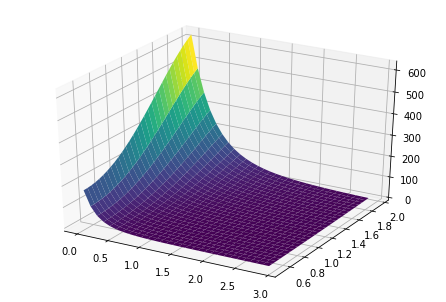

In [16]:
X = np.arange(0, 3, 0.1)
Y = np.arange(0.5, 2, ((2-0.5)/len(X)))

E = np.zeros((len(X), len(Y)))

for i,x in enumerate(X):
    print(x)
    for j,y in enumerate(Y):
        E[i][j] = compute_e(x, y)

X, Y = np.meshgrid(X, Y)

print(X.shape, Y.shape, E.shape)

fig = plt.figure()

ax = Axes3D(fig)
ax.plot_surface(X, Y, E,  cmap=cm.viridis)

plt.show()



In [18]:
print(E)

[[ 1.72519418e+02  1.02977429e+02  6.39238301e+01  4.10908809e+01
   2.72284850e+01  1.85208412e+01  1.28831170e+01  9.13396475e+00
   6.58092554e+00  4.80539874e+00  3.54718971e+00  2.64045431e+00
   1.97706260e+00  1.48505256e+00  1.11563130e+00  8.35148333e-01
   6.20032477e-01  4.53535238e-01  3.23598297e-01  2.21433841e-01
   1.40564910e-01  7.61674673e-02  2.46133538e-02 -1.68511240e-02
  -5.03338241e-02 -7.74611543e-02 -9.94974613e-02 -1.17432561e-01
  -1.32046488e-01 -1.43957796e-01]
 [ 1.73339096e+02  1.03589010e+02  6.43828712e+01  4.14403152e+01
   2.74988919e+01  1.87334949e+01  1.30528564e+01  9.27127819e+00
   6.69334999e+00  4.89844255e+00  3.62494386e+00  2.70600271e+00
   2.03276201e+00  1.53272667e+00  1.15670754e+00  8.70755714e-01
   6.51072594e-01  4.80734485e-01  3.47546721e-01  2.42614383e-01
   1.59375641e-01  9.29386671e-02  3.96207427e-02 -3.37604656e-03
  -3.81956363e-02 -6.64940518e-02 -8.95600947e-02 -1.08403886e-01
  -1.23822405e-01 -1.36448419e-01]
 [ 1.7